In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gzip
import seaborn as sns

Step 1: Loading the dataset

In [ ]:
import pandas as pd

path = '/dataset.csv'
health_data = pd.read_csv(path, on_bad_lines='skip', engine='python')


In [ ]:
health_data.head(5)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."


In [ ]:
health_data.tail(5)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
1247,2684,Apple and Cheddar Corn Muffins,NaN,PT0S,PT0S,"c(""flour"", ""yellow cornmeal"", ""baking powder"",...",206.6,8.0,1.1,47.6,143.4,29.2,1.9,9.8,5.3,"c(""Preheat oven to 400."", ""Line 12 muffin cups..."
1248,2685,Hot Jonkanoo Shrimp,NaN,PT0S,PT0S,"c(""jumbo shrimp"", ""red wine vinegar"", ""butter""...",124.3,7.7,4.4,112.3,561.5,3.2,0.9,0.4,11.0,"c(""In a large skillet melt butter over a low f..."
1249,2686,Hot Jalapeno Pepper Jelly,PT20M,PT30M,PT50M,"c(""cranberry juice cocktail"", ""vinegar"", ""sugar"")",51.6,0.0,0.0,0.0,0.3,13.2,0.0,13.1,0.0,"c(""Wash hot peppers, cut off stem and halve th..."
1250,2687,Hot Pizza Dip,PT10M,PT10M,PT20M,"c(""cream cheese"", ""garlic powder"", ""mozzarella...",202.5,16.8,9.8,55.2,309.8,3.5,0.5,1.7,9.6,"c(""Combine cream cheese and seasonings."", ""Spr..."
1251,2688,How to Toast Pecans,PT5M,PT1M,PT6M,"""pecans""",753.2,78.5,6.7,0.0,0.0,15.1,10.5,4.3,10.0,"c(""Preheat oven to 350°F."", ""Lightly spritz ba..."


In [ ]:
health_data.columns

Index(['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime',
       'RecipeIngredientParts', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeInstructions'],
      dtype='object')

In [ ]:
health_data.value_counts().T

,,,,,,,,,,,,,,,,count
RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,
38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla yogurt"", ""lemon juice"")",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stand for 45 minutes, stirring occasionally."", ""Transfer berry-sugar mixture to food processor."", ""Add yogurt and process until smooth."", ""Strain through fine sieve. Pour into baking pan (or transfer to ice cream maker and process according to manufacturers' directions). Freeze uncovered until edges are solid but centre is soft. Transfer to processor and blend until smooth again."", ""Return to pan and freeze until edges are solid."", ""Transfer to processor and blend until smooth again."", \n""Fold in remaining 2 cups of blueberries."", ""Pour into plastic mold and freeze overnight. Let soften slightly to serve."")",1
1085,Scottish Scones,PT30M,PT25M,PT55M,"c(""flour"", ""rolled oats"", ""brown sugar"", ""baking powder"", ""salt"", ""cinnamon"", ""butter"", ""margarine"", ""milk"", ""butter"", ""margarine"", ""sugar"", ""cinnamon"")",271.7,14.2,8.7,36.5,360.4,32.5,1.5,8.4,4.1,"c(""Heat oven to 375 degrees."", ""Lightly grease cookie sheet. In med."", ""bowl, combine flour, oats, brown sugar, baking powder, salt and cinnamon; mix well."", ""With pastry blender or fork, cut in butter until mixture is crumbly."", ""Add milk all at once; stir just until dry ingredients are moistened."", ""On floured surface, gently knead dough 5 or 6 times."", ""Place on greased cookie sheet; press into a 6\"" round, about 1\"" thick."", ""Brush top with melted butter."", ""In small bowl, combine sugar and cinnamon; mix well."", \n""Sprinkle over top."", ""Cut into 8 wedges; separate slightly."", ""Bake for 20-30 minute."", ""or until golden brown."", ""Serve warm."")",1
1033,Pumpkin Citrus Syrup Cake,PT1H,PT30M,PT1H30M,"c(""butter"", ""lemons, rind of"", ""caster sugar"", ""eggs"", ""self raising flour"", ""pumpkin"", ""lemon juice"", ""sugar"")",361.3,18.3,11.1,97.4,137.4,46.7,0.8,29.8,4.0,"c(""Grease a deep 23cm round cake tin, line the base with baking paper."", ""Cream butter, rinds and sugar until light and fluffy, add egg yolks; beat until combined."", ""Stir in half the sifted flour with half the cold pumpkin, then stir in the remaining flour and pumpkin."", ""Beat the egg whites until soft peaks form, fold through the cake mixture. Spread mixture into cake tin."", ""Bake in a moderate oven about 1 hour or until cooked when tested with skewer."", ""Pour hot syrup over hot cake and let stand 10 minutes before turning out onto a rack to cool."", \n""To make syrup:- Combine all ingredients in saucepan."", ""Stir constantly over heat without boiling until sugar is dissolved."", ""Bring to boil, reduce heat, simmer 2 minutes without stirring."")",1
1044,Raised Waffles,PT15M,PT25M,PT40M,"c(""water"", ""active dry yeast"", ""granulated sugar"", ""water"", ""butter"", ""salt"", ""flour"", ""eggs"", ""baking soda"", ""pure maple syrup"")",427.8,19.8,11.7,119.2,725.9,47.2,1.9,10.6,15.1,"c(""* Flour may be any of or any combination of white, whole wheat, rye, oat, buckwheat, yellow cornmeal, or blue cornmeal."", ""Put the 3/4 cup water into a large bowl and sprinkle in the yeast and sugar. Let dissolve for 5 minutes."", ""Add the 2 1/2 cups water, the milk, butter, salt, and flour(s) to the yeast mixture and whisk until smooth and blended."", ""Cover the bowl with plastic wrap and let stand overnight at room temperature. (The batter will rise to double its original volume.) Before baking the waffles, beat in the eggs, then add the baking soda and stir until well combined."", \n""(The batter will be thin.) Pour 1/2 to 3/4 cup batter into a very hot waffle iron and bake until golden and cr

In [ ]:
health_data['Calories'].min()

0.0

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecipeId               1252 non-null   int64  
 1   Name                   1252 non-null   object 
 2   CookTime               738 non-null    object 
 3   PrepTime               1252 non-null   object 
 4   TotalTime              1252 non-null   object 
 5   RecipeIngredientParts  1252 non-null   object 
 6   Calories               1252 non-null   float64
 7   FatContent             1252 non-null   float64
 8   SaturatedFatContent    1252 non-null   float64
 9   CholesterolContent     1252 non-null   float64
 10  SodiumContent          1252 non-null   float64
 11  CarbohydrateContent    1252 non-null   float64
 12  FiberContent           1252 non-null   float64
 13  SugarContent           1252 non-null   float64
 14  ProteinContent         1252 non-null   float64
 15  Reci

In [ ]:
health_data.isna().T

,0,1,2,3,4,5,6,7,8,9,...,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251
RecipeId,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Name,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CookTime,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,True,True,False,False,False
PrepTime,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TotalTime,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RecipeIngredientParts,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Calories,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
FatContent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SaturatedFatContent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CholesterolContent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
health_data['Calories'].T

,Calories
0,170.9
1,1110.7
2,311.1
3,536.1
4,103.6
...,...
1247,206.6
1248,124.3
1249,51.6
1250,202.5


Handle Missing Data

In [ ]:
# Select numeric columns only
numerical_cols = health_data.select_dtypes(include=[np.number]).columns

# Impute missing values with the mean for numeric columns
health_data[numerical_cols] = health_data[numerical_cols].fillna(health_data[numerical_cols].mean())



In [ ]:
# Select categorical columns only
categorical_cols = health_data.select_dtypes(include=['object']).columns

# Impute missing values with the mode for categorical columns
for col in categorical_cols:
    health_data[col] = health_data[col].fillna(health_data[col].mode()[0])


In [ ]:
# Identify numerical columns
numerical_cols = health_data.select_dtypes(include=[np.number]).columns

# Impute missing values with the median for numerical columns
health_data[numerical_cols] = health_data[numerical_cols].fillna(health_data[numerical_cols].median())

# Handle missing values for text columns (e.g., RecipeInstructions)
# For simplicity, we can fill text columns with a placeholder like 'Unknown' or drop them
text_columns = health_data.select_dtypes(include=[object]).columns
health_data[text_columns] = health_data[text_columns].fillna('Unknown')

# Verify the changes
print(health_data.isna().sum())


RecipeId                 0
Name                     0
CookTime                 0
PrepTime                 0
TotalTime                0
RecipeIngredientParts    0
Calories                 0
FatContent               0
SaturatedFatContent      0
CholesterolContent       0
SodiumContent            0
CarbohydrateContent      0
FiberContent             0
SugarContent             0
ProteinContent           0
RecipeInstructions       0
dtype: int64


Feature Engineering

In [ ]:
# 1. Combine 'CookTime' and 'PrepTime' into 'TotalTime' (if needed)
health_data['TotalTime'] = health_data['CookTime'] + health_data['PrepTime']

# 2. Create a new 'HealthScore' based on Calories, FatContent, and ProteinContent
# We can scale them based on a simple heuristic, e.g., lower calories and fat could mean a healthier recipe.
# You can adjust the weights based on your analysis or domain knowledge.

health_data['HealthScore'] = (
    (health_data['Calories'] * 0.3) +  # Weight for Calories (higher calories might lower health score)
    (health_data['FatContent'] * 0.5) -  # Weight for FatContent (higher fat might lower health score)
    (health_data['ProteinContent'] * 0.2)  # Weight for ProteinContent (higher protein might increase health score)
)

# Ensure HealthScore doesn't end up negative by clipping
health_data['HealthScore'] = health_data['HealthScore'].clip(lower=0)

# Check the updated DataFrame
health_data[['CookTime', 'PrepTime', 'TotalTime', 'Calories', 'FatContent', 'ProteinContent', 'HealthScore']].head()



,CookTime,PrepTime,TotalTime,Calories,FatContent,ProteinContent,HealthScore
0,PT24H,PT45M,PT24HPT45M,170.9,2.5,3.2,51.88
1,PT25M,PT4H,PT25MPT4H,1110.7,58.8,63.4,349.93
2,PT5M,PT30M,PT5MPT30M,311.1,0.2,0.3,93.37
3,PT20M,PT24H,PT20MPT24H,536.1,24.0,29.3,166.97
4,PT30M,PT20M,PT30MPT20M,103.6,0.4,4.3,30.42


One-hot encoding categorical features

In [ ]:
# One-hot encoding for categorical columns
# RecipeIngredientParts, Name, or any other categorical column
# Let's assume RecipeIngredientParts and Name need encoding

health_data = pd.get_dummies(health_data, columns=['RecipeIngredientParts', 'Name'], drop_first=True)

# Check the first few rows to confirm the encoding
health_data.head()


,RecipeId,CookTime,PrepTime,TotalTime,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,...,Name_Zesty Punch Sipper,Name_Zesty Sweet Potato Pie,Name_Zucchini Bars,Name_Zucchini Frittatas II,Name_Zucchini Lasagna (Lasagne) - Low Carb,Name_Zucchini Pizza,Name_Zucchini Puff Pies,Name_Zucchini Quiche,Name_Zucchini Squash With Parmesan,Name_Zucchini or Yellow Squash Patties and Dressing
0,38,PT24H,PT45M,PT24HPT45M,170.9,2.5,1.3,8.0,29.8,37.1,...,False,False,False,False,False,False,False,False,False,False
1,39,PT25M,PT4H,PT25MPT4H,1110.7,58.8,16.6,372.8,368.4,84.4,...,False,False,False,False,False,False,False,False,False,False
2,40,PT5M,PT30M,PT5MPT30M,311.1,0.2,0.0,0.0,1.8,81.5,...,False,False,False,False,False,False,False,False,False,False
3,41,PT20M,PT24H,PT20MPT24H,536.1,24.0,3.8,0.0,1558.6,64.2,...,False,False,False,False,False,False,False,False,False,False
4,42,PT30M,PT20M,PT30MPT20M,103.6,0.4,0.1,0.0,959.3,25.1,...,False,False,False,False,False,False,False,False,False,False


Step 2 : Visualizing the dataset

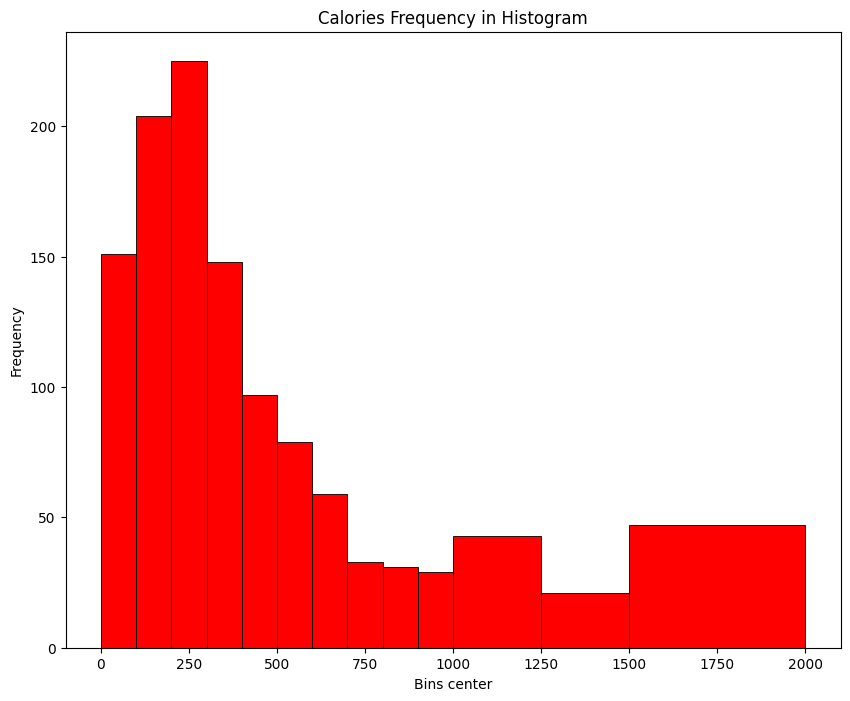

In [ ]:
fx,ax = plt.subplots(figsize=(10,8))
plt.title('Calories Frequency in Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins center')
ax.hist(
    health_data['Calories'],
    bins=[0,100,200,300,400,500,600,700,800,900,1000,1250,1500,2000],
    linewidth=0.6,
    color='red',
    edgecolor='black'
    )
plt.show()

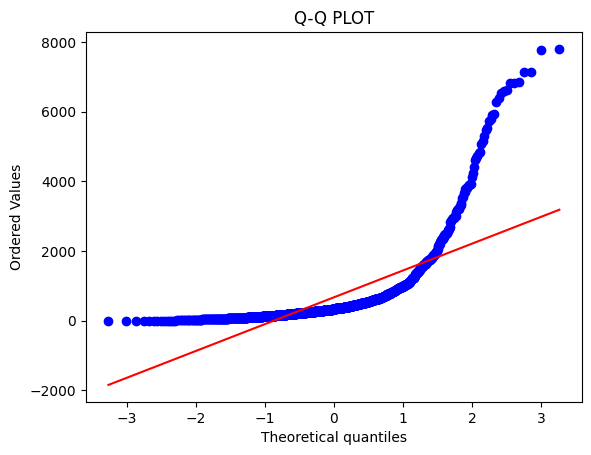

In [ ]:
import scipy.stats as stats

sample_data = health_data['Calories']

stats.probplot(sample_data,dist='norm',plot=plt)
plt.title('Q-Q PLOT')
plt.show()

Histograms for Numerical Features

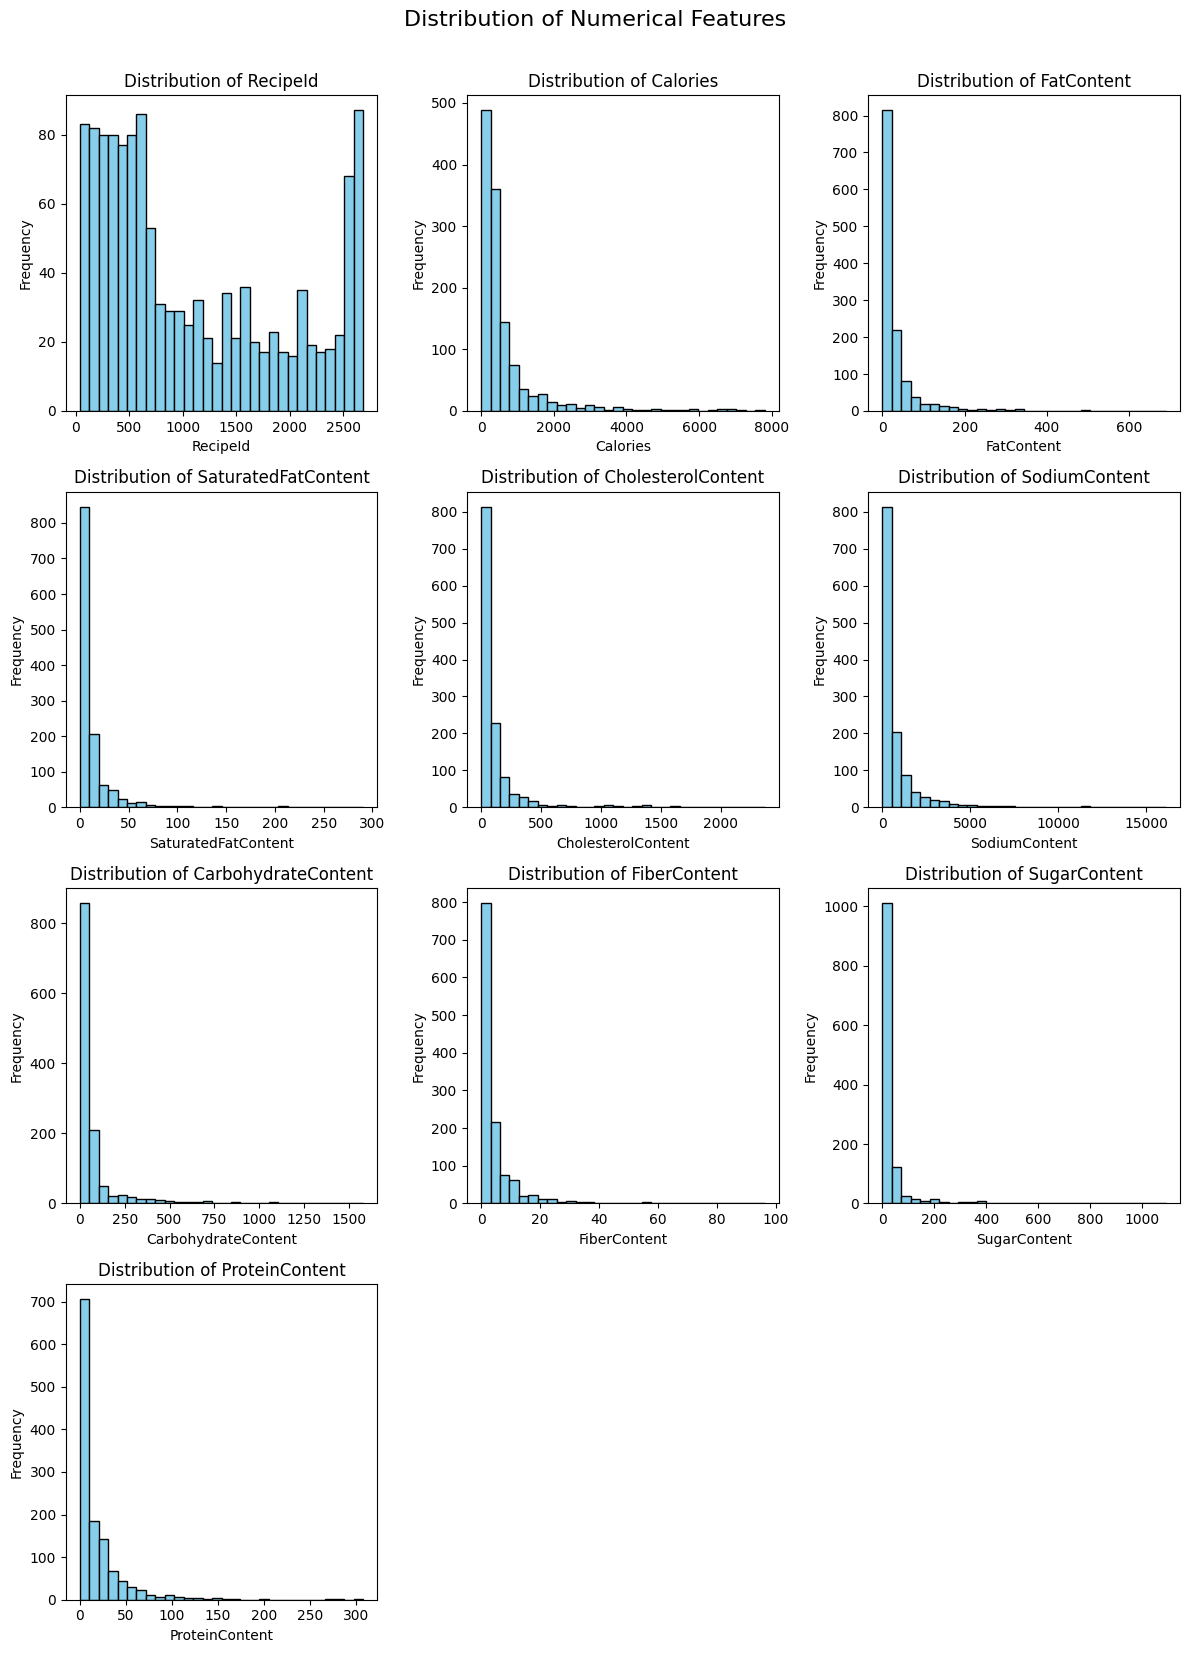

In [ ]:
# Select numerical columns
numerical_cols = health_data.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed based on the number of features
n_cols = 3  # Number of columns in the subplot grid
n_rows = int(np.ceil(len(numerical_cols) / n_cols))  # Calculate rows based on the number of columns

# Set up the figure size based on the number of subplots
plt.figure(figsize=(12, 4 * n_rows))

# Plot individual histograms for each numerical feature
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each numerical feature
    plt.hist(health_data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout to prevent overlapping

# Adjust the position of the title to ensure it doesn't overlap with subplots
plt.suptitle("Distribution of Numerical Features", fontsize=16, y=1.03)  # Adjust y value to move the title upwards
plt.show()


Boxplots for Outlier Detection

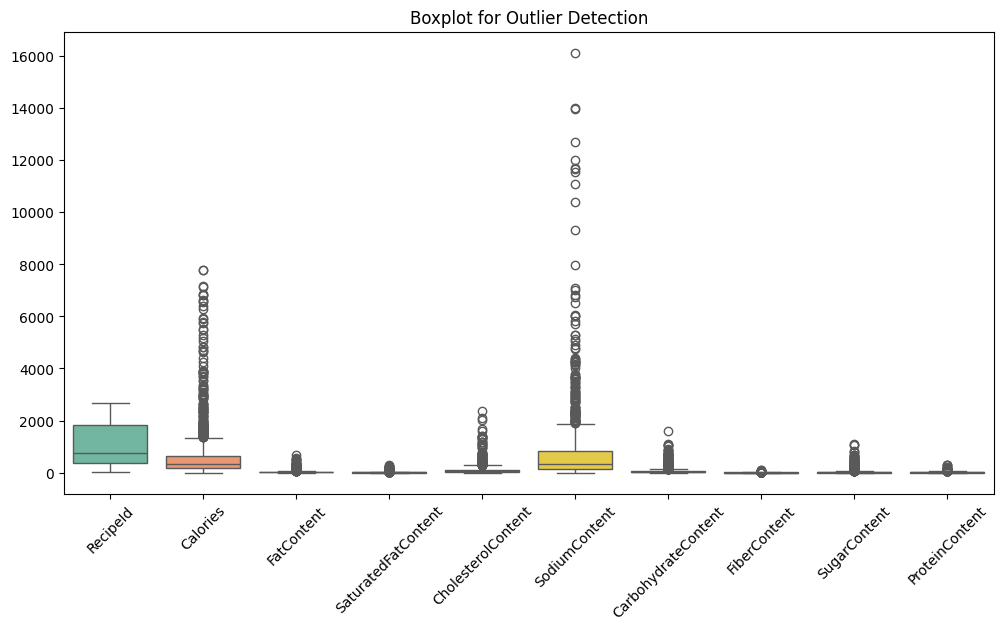

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=health_data, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

 Step 4: Correlation Analysis

Heatmap of Feature Correlation

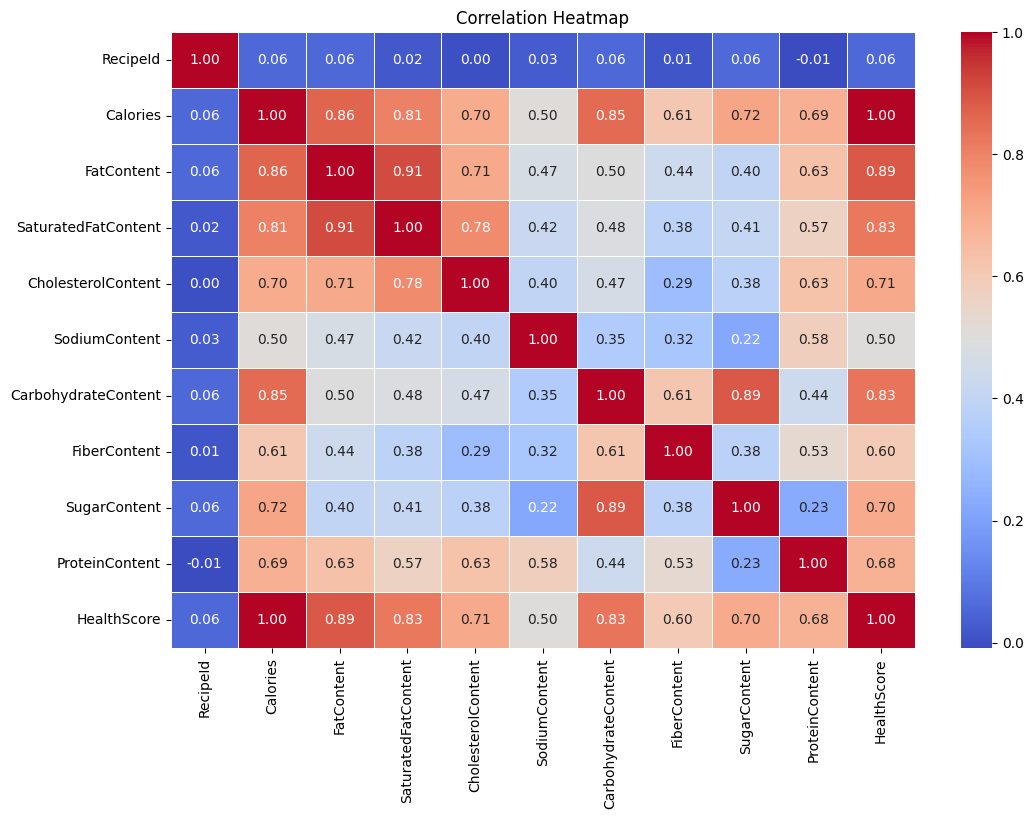

In [ ]:
# Select only numerical columns from the dataframe
numeric_columns = health_data.select_dtypes(include=[np.number])

# Calculate correlation matrix for numerical columns
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Pairplot for Feature Relationships

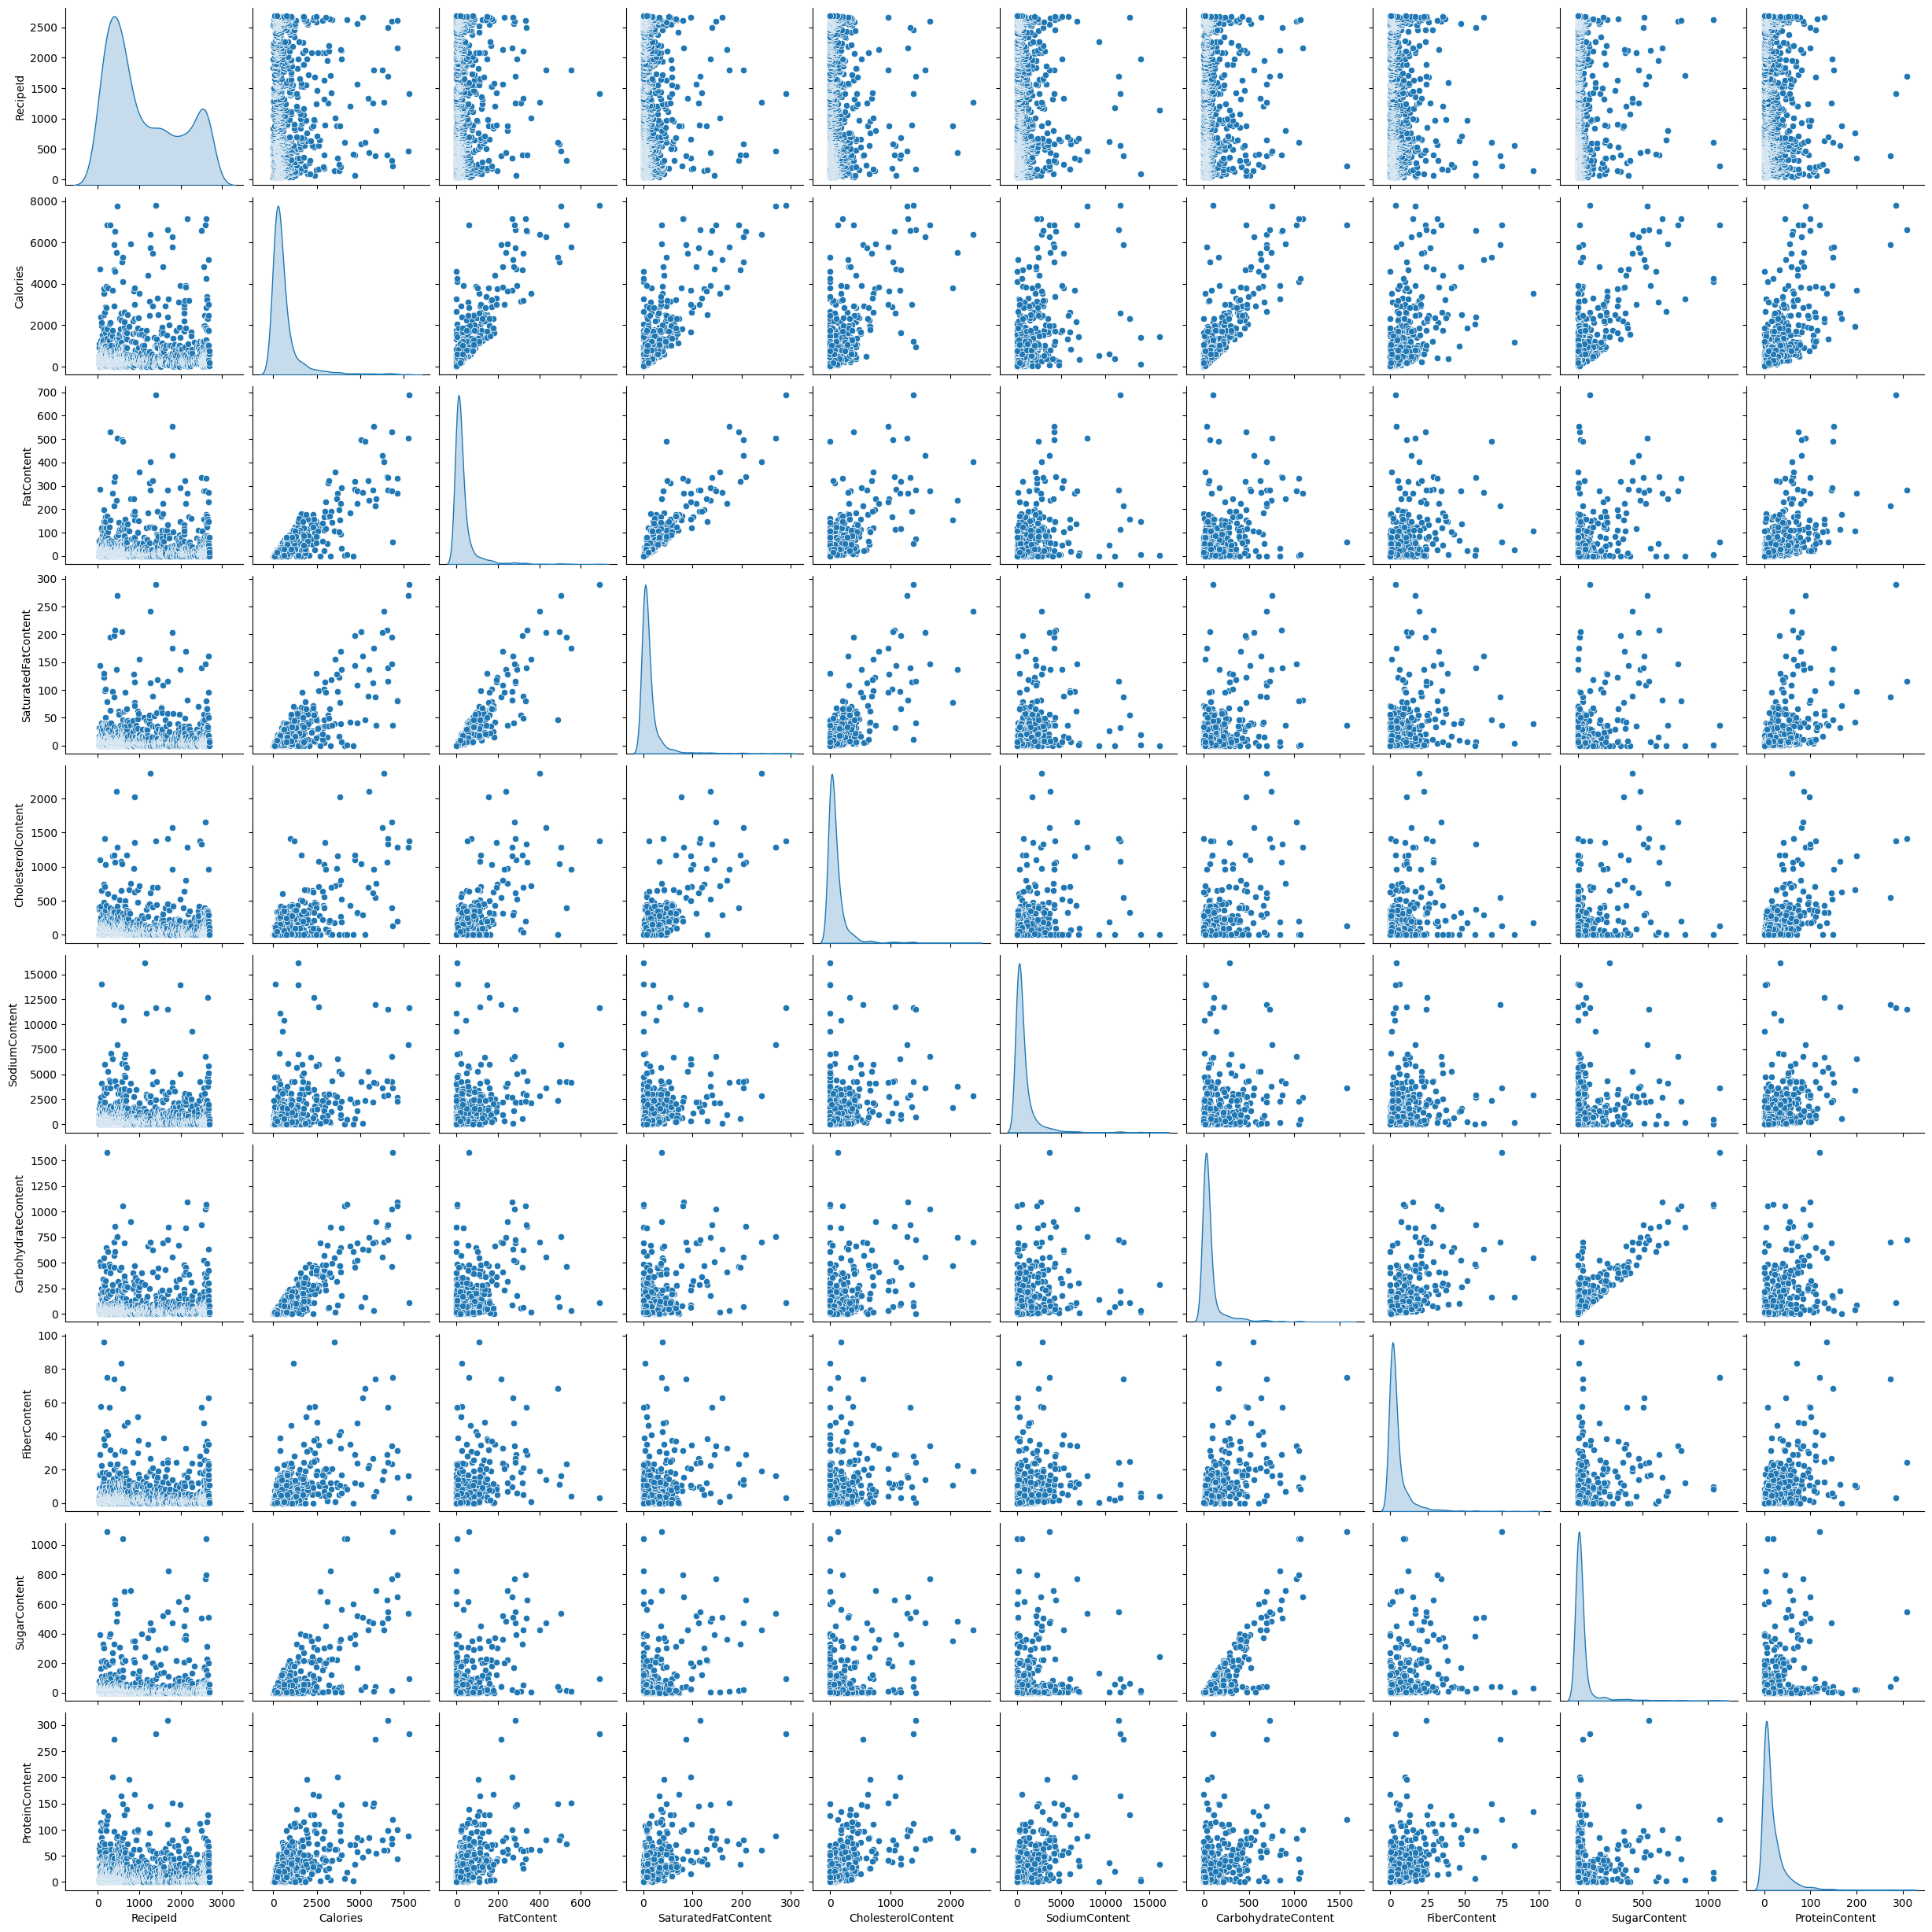

In [ ]:
sns.pairplot(health_data, diag_kind='kde')
plt.show()


 Bar Plot for Categorical Features

<ipython-input-52-2f3439194384>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=health_data, x='Calories_Category', palette='Blues')


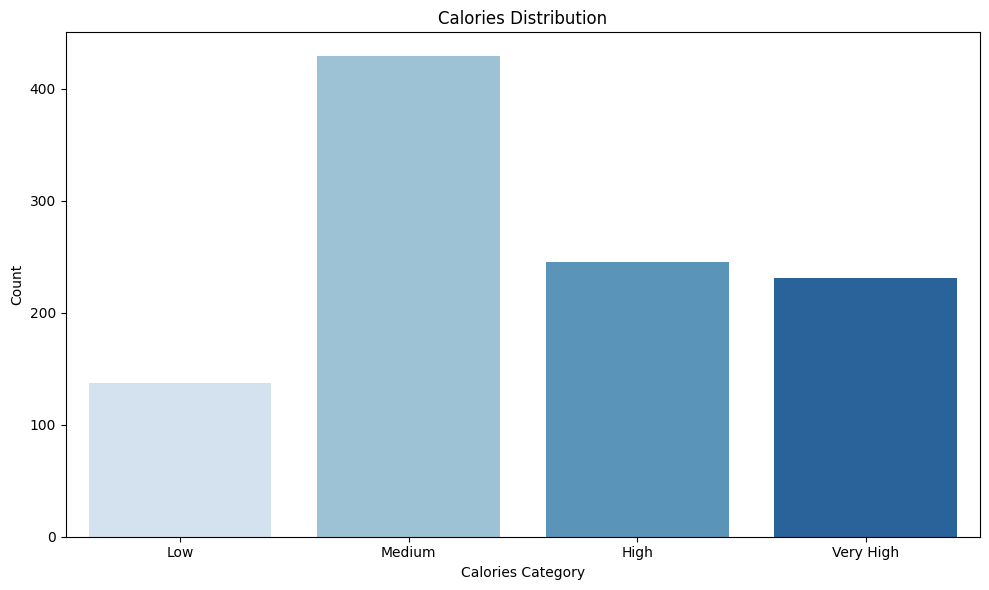

<ipython-input-52-2f3439194384>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=health_data, x='FatContent', palette='Reds')


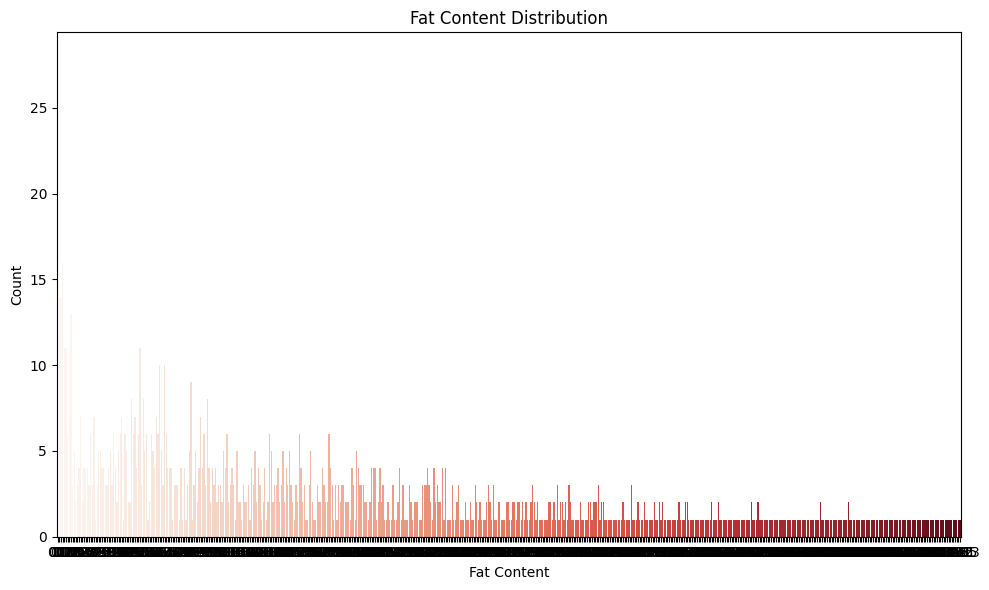

<ipython-input-52-2f3439194384>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=health_data, x='ProteinContent', palette='Greens')


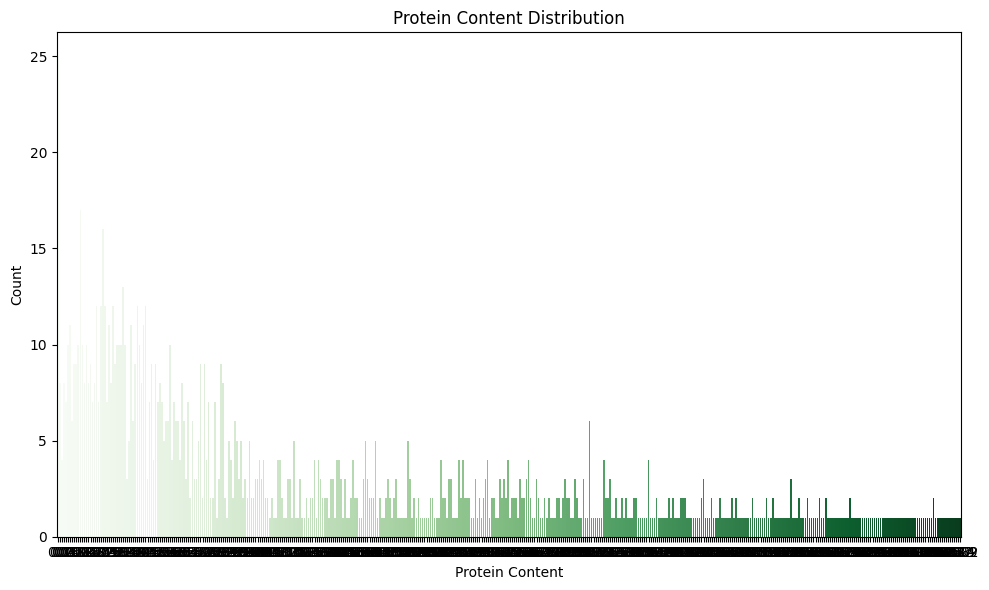

In [ ]:
# Let's first check if 'Calories', 'FatContent', and 'ProteinContent' are numeric or need to be categorized
health_data['Calories'] = pd.to_numeric(health_data['Calories'], errors='coerce')
health_data['FatContent'] = pd.to_numeric(health_data['FatContent'], errors='coerce')
health_data['ProteinContent'] = pd.to_numeric(health_data['ProteinContent'], errors='coerce')

# Bin the Calories into categories: low, medium, high
health_data['Calories_Category'] = pd.cut(health_data['Calories'], bins=[0, 100, 300, 500, 1000],
                                           labels=['Low', 'Medium', 'High', 'Very High'])

# Bar plot for Calories Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=health_data, x='Calories_Category', palette='Blues')
plt.title('Calories Distribution')
plt.xlabel('Calories Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bar plot for Fat Content Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=health_data, x='FatContent', palette='Reds')
plt.title('Fat Content Distribution')
plt.xlabel('Fat Content')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bar plot for Protein Content Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=health_data, x='ProteinContent', palette='Greens')
plt.title('Protein Content Distribution')
plt.xlabel('Protein Content')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Histogram for Numerical Features (e.g., Calories)

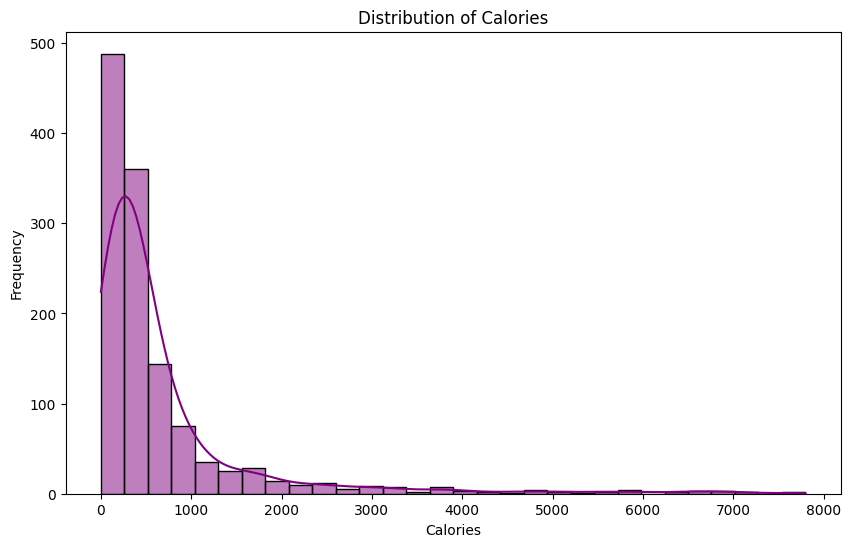

In [ ]:
# Plot histogram for 'Calories'
plt.figure(figsize=(10, 6))
sns.histplot(health_data['Calories'], bins=30, kde=True, color='purple')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


 Box Plot for Numerical Features (e.g., FatContent):

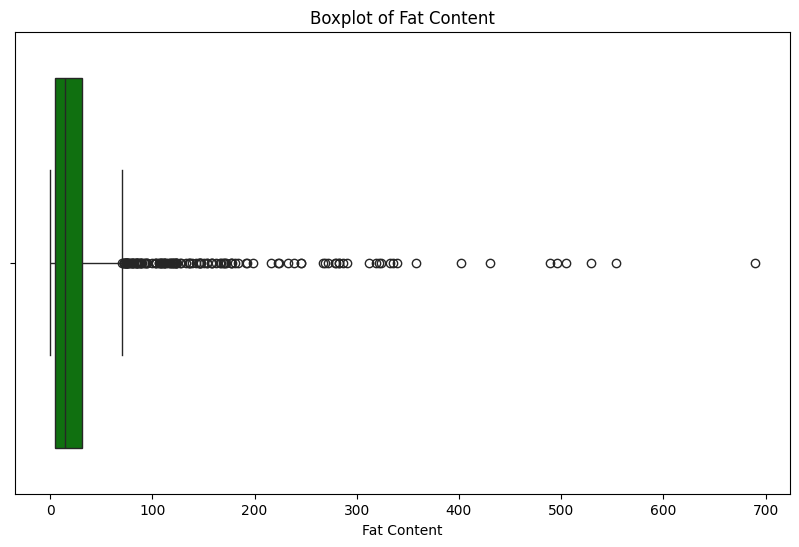

In [ ]:
# Plot boxplot for 'FatContent'
plt.figure(figsize=(10, 6))
sns.boxplot(x=health_data['FatContent'], color='green')
plt.title('Boxplot of Fat Content')
plt.xlabel('Fat Content')
plt.show()


Prepare the data

In [ ]:
# Print column names to verify
print(extracted_data.columns)

# Update numeric_columns list based on actual column names
numeric_columns = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
    'ProteinContent'
]

# Strip column names (already done, but included for completeness)
extracted_data.columns = extracted_data.columns.str.strip()

# Convert the relevant columns to numeric, coercing errors to NaN
for col in numeric_columns:
    extracted_data[col] = pd.to_numeric(extracted_data[col], errors='coerce')

# Define the max limits for each of these columns
max_list = [
    2000, 100, 13, 300, 2300, 325, 40, 40, 200
]

# Apply filtering: Ensure that each column value is less than the corresponding max
for col, maximum in zip(numeric_columns, max_list):
    extracted_data = extracted_data[extracted_data[col] < maximum]

# Check the filtered data
print(extracted_data.head())

Index(['RecipeId', 'CookTime', 'PrepTime', 'TotalTime', 'Calories',
       'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent',
       ...
       'Name_Zesty Sweet Potato Pie', 'Name_Zucchini Bars',
       'Name_Zucchini Frittatas II',
       'Name_Zucchini Lasagna (Lasagne) - Low Carb', 'Name_Zucchini Pizza',
       'Name_Zucchini Puff Pies', 'Name_Zucchini Quiche',
       'Name_Zucchini Squash With Parmesan',
       'Name_Zucchini or Yellow Squash Patties and Dressing',
       'Calories_Category'],
      dtype='object', length=2510)
    RecipeId CookTime PrepTime       TotalTime  Calories  FatContent  \
8         46     PT1H    PT25M       PT1HPT25M       4.3         0.0   
19        57     PT1H    PT10M       PT1HPT10M     114.3         3.8   
30        69  PT1H50M  PT2H45M  PT1H50MPT2H45M      21.1         0.3   
52        92     PT1H    PT10M       PT1HPT10M     141.4         5.0   
56        97    PT40M  PT1H10M    PT40MPT1H10M

In [ ]:
extracted_data = health_data.copy()
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Columns: 2510 entries, RecipeId to Calories_Category
dtypes: bool(2494), category(1), float64(10), int64(1), object(4)
memory usage: 3.1+ MB


In [ ]:
# Select only numeric columns for correlation
numeric_columns = extracted_data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation only on numeric columns
correlation_matrix = extracted_data[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                     RecipeId  Calories  FatContent  SaturatedFatContent  \
RecipeId             1.000000  0.055953    0.055191             0.020856   
Calories             0.055953  1.000000    0.864715             0.806749   
FatContent           0.055191  0.864715    1.000000             0.912967   
SaturatedFatContent  0.020856  0.806749    0.912967             1.000000   
CholesterolContent   0.000842  0.698934    0.706325             0.780126   
SodiumContent        0.028961  0.503297    0.470636             0.422597   
CarbohydrateContent  0.057095  0.853171    0.496140             0.484903   
FiberContent         0.014078  0.611299    0.439254             0.381561   
SugarContent         0.059337  0.719718    0.398575             0.410882   
ProteinContent      -0.009368  0.686696    0.632467             0.569668   
HealthScore          0.057329  0.998895    0.886563             0.825616   

                     CholesterolContent  SodiumContent  CarbohydrateContent  \
RecipeId

In [ ]:
from sklearn.preprocessing import StandardScaler

# Check the data types of the columns in the relevant subset
numeric_columns = extracted_data.iloc[:, 6:15].select_dtypes(include=[np.number])

# If numeric_columns is empty, it means there are no numeric columns in that subset
if not numeric_columns.empty:
    scaler = StandardScaler()
    # Apply scaling only to numeric columns
    prep_data = scaler.fit_transform(numeric_columns)
else:
    print("No numeric columns available in the selected range.")

# If you want to check the scaling process:
print(prep_data)


[[-0.4362376  -0.46045926 -0.50816499 ... -0.07924667 -0.54386056
  -0.48320178]
 [ 0.13267732  1.23991932 -0.28061397 ... -0.17388972  1.5984957
   0.40943183]
 [-0.48457678 -0.49774826 -0.52698196 ...  0.3746537  -0.64706377
  -0.35894287]
 ...
 [-0.48457678 -0.49774826 -0.52799001 ... -0.24438914 -0.65773996
  -0.59221658]
 [-0.12017376 -0.24045414 -0.31999521 ... -0.35448412 -0.31610175
  -0.43722987]
 [-0.2354441  -0.49774826 -0.52819163 ... -0.32937474 -0.30186683
   0.14971303]]


In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [ ]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [ ]:
# Select only numeric columns from the specified range
numeric_columns_subset = extracted_data.iloc[:, 6:15].select_dtypes(include=[np.number])

# If numeric columns are available, apply the transformation
if not numeric_columns_subset.empty:
    # Apply the transformation
    transformed_data = pipeline.transform(numeric_columns_subset.iloc[0:1, :].to_numpy())
    print(transformed_data)

    # Assuming you want to access the first row after transformation
    transformed_row = transformed_data[0]  # First row of transformed data

    # Now, you can do something like:
    # Extract the original row based on your transformed data (this is an example of how to use the original indices)
    original_row = extracted_data.iloc[0]
    print(original_row)
else:
    print("No numeric columns found in the selected range.")


[[  0 631 278  52 972 751 664 803 135 649]]
RecipeId                                                       38
CookTime                                                    PT24H
PrepTime                                                    PT45M
TotalTime                                              PT24HPT45M
Calories                                                    170.9
                                                          ...    
Name_Zucchini Puff Pies                                     False
Name_Zucchini Quiche                                        False
Name_Zucchini Squash With Parmesan                          False
Name_Zucchini or Yellow Squash Patties and Dressing         False
Calories_Category                                          Medium
Name: 0, Length: 2510, dtype: object


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Select only numeric columns from the specified range
numeric_columns_subset = extracted_data.iloc[:, 6:15].select_dtypes(include=[np.number])

# Ensure the data contains only numeric values before applying transformations
if not numeric_columns_subset.empty:
    # Apply the transformation
    transformed_first_row = pipeline.transform(numeric_columns_subset.iloc[0:1, :].to_numpy())[0]
    print(transformed_first_row)
else:
    print("No numeric columns found in the selected range.")


[  0 631 278  52 972 751 664 803 135 649]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Change to other models if needed
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor  # Example if you're using a random forest
from sklearn.svm import SVR  # Example if you're using Support Vector Regression


Splitting the Data:

In [ ]:
# Feature Selection
X = health_data.drop(columns=['Calories', 'HealthScore'])  # Drop target columns or any irrelevant ones
y = health_data['Calories']  # Or 'HealthScore' if you're predicting health score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardization (if required):

In [ ]:
def convert_duration_to_minutes(duration):
    if isinstance(duration, str) and duration.startswith('PT'):
        time_str = duration[2:]  # Remove the 'PT' prefix
        minutes = 0

        # Case where the time_str is a simple number (e.g., PT1, PT15, etc.)
        if time_str.isdigit():
            return int(time_str)

        # Case with minutes and possibly hours (e.g., PT1H15M, PT30M, PT1H)
        if 'H' in time_str:
            hours = time_str.split('H')[0]
            try:
                minutes += int(hours) * 60
            except ValueError:
                minutes += 0  # If hours is not a number, just ignore it
            time_str = time_str.split('H')[1]  # Remaining part after hours

        # Now handle minutes (e.g., PT15M, PT5M)
        if 'M' in time_str:
            minutes += int(time_str.split('M')[0]) if time_str.split('M')[0].isdigit() else 0

        return minutes

    return 0  # Default return 0 if the string doesn't match the expected format





In [ ]:
# Apply the conversion function to both training and test data for duration columns
X_train['CookTime'] = X_train['CookTime'].apply(convert_duration_to_minutes)
X_train['PrepTime'] = X_train['PrepTime'].apply(convert_duration_to_minutes)
X_train['TotalTime'] = X_train['TotalTime'].apply(convert_duration_to_minutes)

X_test['CookTime'] = X_test['CookTime'].apply(convert_duration_to_minutes)
X_test['PrepTime'] = X_test['PrepTime'].apply(convert_duration_to_minutes)
X_test['TotalTime'] = X_test['TotalTime'].apply(convert_duration_to_minutes)


In [ ]:
# Check for non-numeric columns in X_test
non_numeric_cols = X_test.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns in X_test: {non_numeric_cols}")

# Drop non-numeric columns if necessary
X_test = X_test.drop(columns=non_numeric_cols)


Non-numeric columns in X_test: Index([], dtype='object')


In [ ]:
# Align columns
common_columns = X_train.columns.intersection(X_test.columns)

# Now scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[common_columns])  # Fit on training data
X_test_scaled = scaler.transform(X_test[common_columns])  # Transform test data using the same scaler


Artificial Neural Networks (ANN) for Personalized Recommendations

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the input shape (number of features in your dataset)
input_shape = X_train.shape[1]  # This will get the number of features in X_train

model = Sequential([
    Dense(64, activation='relu', input_dim=input_shape),  # Replace input_shape with the actual number of features
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer
])

model.compile(optimizer=Adam(), loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions
predictions = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1104126.1250
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 761191.8750
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 466644.9062
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 416978.6562
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 212848.9688
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 135866.6562
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87629.5938
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72581.3828
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67344.0781
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60761.7305
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (Modify path accordingly)
df = pd.read_csv("/dataset.csv", encoding="utf-8", engine="python", on_bad_lines="skip")

# Check column names
print(df.columns)

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                        'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
                        'ProteinContent'])

# Splitting features and target
X = df[['FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
        'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
y = df['Calories']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression (predicting Calories)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Predict
predictions = model.predict(X_test)

# Show results
print("Predicted Calories for the first 5 samples:", predictions[:5].flatten())
print("Actual Calories for the first 5 samples:", y_test[:5].values)

Index(['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime',
       'RecipeIngredientParts', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeInstructions'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6993/6993 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 245783.7500 - mae: 184.3757 - val_loss: 35854.3125 - val_mae: 61.0545
Epoch 2/50
6993/6993 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 94325.4688 - mae: 65.4517 - val_loss: 51314.5469 - val_mae: 55.0130
Epoch 3/50
6993/6993 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 41887.8359 - mae: 63.3360 - val_loss: 67212.6406 - val_mae: 53.1461
Epoch 4/50
6993/6993 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 34774.0000 - mae: 56.0112 - val_loss: 52216.9219 - val_mae: 47.2223
Epoch 5/50
6993/6993 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 48462.8164 - mae: 51.0343 - val_loss: 47123.9102 - val_mae: 43.5446
Epoch 6/50
6993/6993 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 16827.8691 - mae: 45.8851 - val_loss: 48841.5820 - val_mae: 40.9061
Epoch 7/50
6993/6993 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 14222.8652 - mae: 42.3479 - val_loss: 38641.4883 - val_mae: 35.1168
Epoch 8/50
6993/6993 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 12794.5391 - mae: 

Reinforcement Learning (RL) for Adaptive Training Plans

In [ ]:
%pip install stable-baselines3[extra]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import gym
print(gym.envs.registry.keys())


dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4'])


In [ ]:
%pip install shimmy>=2.0 gymnasium


In [ ]:
%pip install --upgrade stable-baselines3


In [ ]:
import gymnasium as gym
from stable_baselines3 import PPO

# Define environment
env = gym.make("CartPole-v1", render_mode="human")


# Create PPO model
model = PPO("MlpPolicy", env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)

# Reset environment correctly
obs = env.reset()[0]  # Fix: Take only the first value

# Run the trained model
for _ in range(1000):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    env.render()

    if terminated or truncated:
        obs = env.reset()[0]  # Fix: Take only the first value

env.close()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | 22.7     |
| time/              |          |
|    fps             | 45       |
|    iterations      | 1        |
|    time_elapsed    | 45       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.2        |
|    ep_rew_mean          | 29.2        |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 2           |
|    time_elapsed         | 89          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008417621 |
|    clip_fraction        | 0.0707      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -0.0119     |
|    learning_rate        | 0.

Long Short-Term Memory (LSTM) Networks for Time-Series Prediction

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Define time steps and features
timesteps = 10   # Adjust based on your dataset
features = 5     # Adjust based on your dataset

# Corrected Model Definition
model = Sequential([
    Input(shape=(timesteps, features)),  # Explicit Input layer
    LSTM(64, activation='relu'),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,985 (70.25 KB)

 Trainable params: 17,985 (70.25 KB)

 Non-trainable params: 0 (0.00 B)

Implementing SVR for Stress Level Detection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Load dataset (Modify path accordingly)
df = pd.read_csv("/dataset.csv", encoding="utf-8", engine="python", on_bad_lines="skip")

# Drop rows with missing values
df = df.dropna(subset=['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                        'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
                        'ProteinContent'])

# Define features and target
X = df[['FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
        'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
y = df['Calories']  # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use SVR instead of SVC
svr = SVR(kernel='linear')  # SVR for regression
svr.fit(X_train, y_train)

# Predictions
svr_predictions = svr.predict(X_test)

# Display first 5 actual vs. predicted values
pred_df = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': svr_predictions[:5]})
print(pred_df)


   Actual    Predicted
0    95.2    98.758139
1   225.6   220.306945
2  3687.7  3738.342823
3  2770.4  2771.100461
4   571.9   583.007920


 Implementing Genetic Algorithm (GA) for Workout Optimization

In [ ]:
import random

def fitness(workout):
    return sum(workout)  # Define a sample fitness function

def mutate(workout):
    index = random.randint(0, len(workout)-1)
    workout[index] = random.randint(1, 10)
    return workout

population = [ [random.randint(1, 10) for _ in range(5)] for _ in range(10)]

for generation in range(100):
    population = sorted(population, key=fitness, reverse=True)
    next_gen = population[:5]  # Select top 5
    for _ in range(5):
        parent = random.choice(population[:5])
        next_gen.append(mutate(parent))
    population = next_gen

print("Best Optimized Workout Plan:", population[0])


Best Optimized Workout Plan: [2, 9, 6, 3, 9]


Hyperparameter Tuning (GridSearchCV, RandomizedSearchCV, Optuna)

1. GridSearchCV for SVR

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 5],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize SVR model
svr = SVR()

# Perform Grid Search
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Best Model
best_svr = grid_search.best_estimator_


Best Parameters: {'C': 10, 'epsilon': 5, 'kernel': 'linear'}


2. Optuna for Hyperparameter Optimization

In [ ]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.2 MB/s eta 0:00:00


In [16]:
import optuna
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the objective function
def objective(trial):
    C = trial.suggest_loguniform('C', 0.1, 100)
    epsilon = trial.suggest_loguniform('epsilon', 0.01, 5)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])

    model = SVR(C=C, epsilon=epsilon, kernel=kernel)
    model.fit(X_train_scaled, y_train)

    preds = model.predict(X_test_scaled)
    return mean_squared_error(y_test, preds)

# Run the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# ✅ Correct way to access best parameters
print("Best Parameters:", study.best_params)

# Train final model with best parameters
best_svr = SVR(**study.best_params)
best_svr.fit(X_train_scaled, y_train)


[I 2025-02-19 14:58:23,602] A new study created in memory with name: no-name-e75baf44-8684-4791-9e8e-16ebf3a85a82
<ipython-input-16-5212e3c40c44>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 100)
<ipython-input-16-5212e3c40c44>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 5)
[I 2025-02-19 14:58:40,516] Trial 0 finished with value: 2004.8654375513065 and parameters: {'C': 67.03823507364358, 'epsilon': 0.4602691430179515, 'kernel': 'linear'}. Best is trial 0 with value: 2004.8654375513065.
<ipython-input-16-5212e3c40c44>:9: FutureWarning: suggest_loguniform has been depreca

Best Parameters: {'C': 3.0855218343216113, 'epsilon': 4.594396904828425, 'kernel': 'linear'}


SVR(C=3.0855218343216113, epsilon=4.594396904828425, kernel='linear')

Feature Engineering

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Create Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Use the new features for training
svr.fit(X_train_poly, y_train)
predictions = svr.predict(X_test_poly)


Ensemble Methods (Stacking, Bagging, Boosting)

1. Stacking Regressor

In [18]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Define base models
base_models = [
    ('svr', SVR(kernel='rbf', C=10, epsilon=0.1)),
    ('rf', RandomForestRegressor(n_estimators=100))
]

# Meta-model
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=Ridge())

# Fit model
stacking_regressor.fit(X_train_scaled, y_train)

# Predict
predictions = stacking_regressor.predict(X_test_scaled)


2. XGBoost Regressor

In [19]:
from xgboost import XGBRegressor

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
predictions = xgb_model.predict(X_test_scaled)


Dimensionality Reduction

1. Using PCA

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train model on reduced feature space
svr.fit(X_train_pca, y_train)
predictions = svr.predict(X_test_pca)
